In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize

import warnings

warnings.filterwarnings('ignore')


1.Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

2.Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

3.Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

4.Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [2]:
sinavlarda_ogrenci = pd.read_csv("StudentsPerformance.csv")
sinavlarda_ogrenci.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

1.Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

In [7]:
sinavlarda_ogrenci['performance'] = (sinavlarda_ogrenci['math score'] + sinavlarda_ogrenci['reading score']+ sinavlarda_ogrenci['writing score']).astype(int)
sinavlarda_ogrenci.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   performance  
0          218  
1          247  
2          278  
3          148  
4          229

In [20]:
sinavlarda_ogrenci.groupby("gender").mean()

math score  reading score  writing score  performance
gender                                                       
female   63.633205      72.608108      72.467181   208.708494
male     68.728216      65.473029      63.311203   197.512448

In [22]:
sinavlarda_ogrenci.groupby("race/ethnicity").mean()

math score  reading score  writing score  performance
race/ethnicity                                                       
group A          61.629213      64.674157      62.674157   188.977528
group B          63.452632      67.352632      65.600000   196.405263
group C          64.463950      69.103448      67.827586   201.394984
group D          67.362595      70.030534      70.145038   207.538168
group E          73.821429      73.028571      71.407143   218.257143

In [23]:
sinavlarda_ogrenci.groupby("parental level of education").mean()

math score  reading score  writing score  \
parental level of education                                             
associate's degree            67.882883      70.927928      69.896396   
bachelor's degree             69.389831      73.000000      73.381356   
high school                   62.137755      64.704082      62.448980   
master's degree               69.745763      75.372881      75.677966   
some college                  67.128319      69.460177      68.840708   
some high school              63.497207      66.938547      64.888268   

                             performance  
parental level of education               
associate's degree            208.707207  
bachelor's degree             215.771186  
high school                   189.290816  
master's degree               220.796610  
some college                  205.429204  
some high school              195.324022

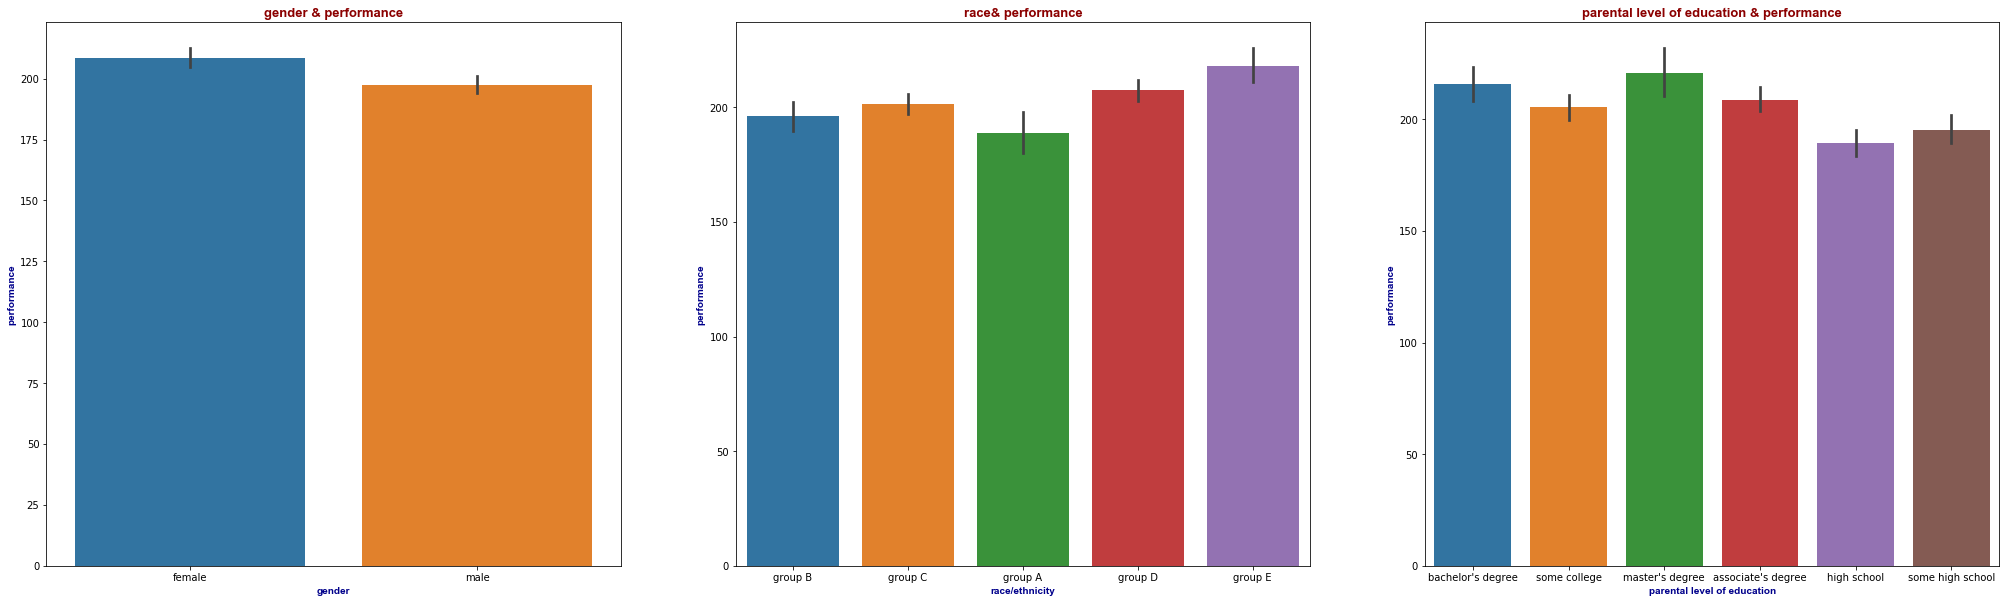

In [30]:
plt.figure(figsize=(35,10))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
sns.barplot(sinavlarda_ogrenci["gender"], sinavlarda_ogrenci["performance"])
plt.title("gender & performance", fontdict=baslik_font)
plt.xlabel('gender', fontdict=eksen_font )
plt.ylabel('performance', fontdict=eksen_font )


plt.subplot(1,3,2)
sns.barplot(sinavlarda_ogrenci["race/ethnicity"], sinavlarda_ogrenci["performance"])
plt.title("race& performance", fontdict=baslik_font)
plt.xlabel('race/ethnicity', fontdict=eksen_font )
plt.ylabel('performance', fontdict=eksen_font )

plt.subplot(1,3,3)
sns.barplot(sinavlarda_ogrenci["parental level of education"], sinavlarda_ogrenci["performance"])
plt.title("parental level of education & performance", fontdict=baslik_font)
plt.xlabel('parental level of education', fontdict=eksen_font )
plt.ylabel('performance', fontdict=eksen_font )

plt.show()

2.Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?


In [3]:
sinavlarda_ogrenci.groupby("lunch").mean()

math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256

In [24]:
#Ogle Yemegi & math score iliskisi
freeLucnh_math = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'free/reduced']['math score']
standartLucnh_math = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'standard']['math score']

In [25]:
ttest = stats.ttest_ind(freeLucnh_math,standartLucnh_math)
ttest

Ttest_indResult(statistic=-11.837180472914612, pvalue=2.4131955993137074e-30)

aralarindaki fark anlamli bir fark <0.05

In [22]:
#Ogle yemegi ve Reading score iliskisi
freeLucnh_reading = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'free/reduced']['reading score']
standartLucnh_reading = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'standard']['reading score']


In [27]:
ttest = stats.ttest_ind(freeLucnh_reading, standartLucnh_reading)
ttest

Ttest_indResult(statistic=-7.451056467473455, pvalue=2.0027966545279011e-13)

In [ ]:
aralarindaki fark anlamli bir fark <0.05

In [29]:
#Lunch ve Writing score iliskisi
freeLucnh_writing = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'free/reduced']['writing score']
standartLucnh_writing = sinavlarda_ogrenci [sinavlarda_ogrenci ["lunch"] == 'standard']['writing score']


In [30]:
ttest = stats.ttest_ind(freeLucnh_writing,standartLucnh_writing)
ttest

Ttest_indResult(statistic=-8.009784197834758, pvalue=3.1861895831664765e-15)

In [ ]:
aralarindaki fark anlamli bir fark <0.05

In [34]:
# t testi ornek tablosu
pd.options.display.float_format = '{:.15f}'.format

for var in ["math score", "lunch"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(freeLucnh_math)):
        for j in range(i+1, len(freeLucnh_math)):
            ttest = stats.ttest_ind(freeLucnh_math,standartLucnh_math)
            grup_1 = freeLucnh_math
            grup_2 = standartLucnh_math
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

grup_1  \
0      3      47
7      40
8      64
9      38
17    ...   
1      3      47
7      40
8      64
9      38
17    ...   
2      3      47
7      40
8      64
9      38
17    ...   
3      3      47
7      40
8      64
9      38
17    ...   
4      3      47
7      40
8      64
9      38
17    ...   
5      3      47
7      40
8      64
9      38
17    ...   
6      3      47
7      40
8      64
9      38
17    ...   
7      3      47
7      40
8      64
9      38
17    ...   
8      3      47
7      40
8      64
9      38
17    ...   
9      3      47
7      40
8      64
9      38
17    ...   
10     3      47
7      40
8      64
9      38
17    ...   
11     3      47
7      40
8      64
9      38
17    ...   
12     3      47
7      40
8      64
9      38
17    ...   
13     3      47
7      40
8      64
9      38
17    ...   
14     3      47
7      40
8      64
9      38
17    ...   
15     3      47
7      40
8      64
9      38
17    ...   
16     3      47
7      40
8      64
9      38
17    ...   
17     3      47
7      40
8      64
9      38
17    ...   
18     3      47
7      40
8      64
9      38
17    ...   
19     3      47
7      40
8      64
9      38
17    ...   
20     3      47
7      40
8      64
9      38
17    ...   
21     3      47
7      40
8      64
9      38
17    ...   
22     3      47
7      40
8      64
9      38
17    ...   
23     3      47
7      40
8      64
9      38
17    ...   
24     3      47
7      40
8      64
9      38
17    ...   
25     3      47
7      40
8      64
9      38
17    ...   
26     3      47
7      40
8      64
9      38
17    ...   
27     3      47
7      40
8      64
9      38
17    ...   
28     3      47
7      40
8      64
9      38
17    ...   
29     3      47
7      40
8      64
9      38
17    ...   
...                                                  ...   
62805  3      47
7      40
8      64
9      38
17    ...   
62806  3      47
7      40
8      64
9      38
17    ...   
62807  3      47
7      40
8      64
9      38
17    ...   
62808  3      47
7      40
8      64
9      38
17    ...   
62809  3      47
7      40
8      64
9      38
17    ...   
62810  3      47
7      40
8      64
9      38
17    ...   
62811  3      47
7      40
8      64
9      38
17    ...   
62812  3      47
7      40
8      64
9      38
17    ...   
62813  3      47
7      40
8      64
9      38
17    ...   
62814  3      47
7      40
8      64
9      38
17    ...   
62815  3      47
7      40
8      64
9      38
17    ...   
62816  3      47
7      40
8      64
9      38
17    ...   
62817  3      47
7      40
8      64
9      38
17    ...   
62818  3      47
7      40
8      64
9      38
17    ...   
62819  3      47
7      40
8      64
9      38
17    ...   
62820  3      47
7      40
8      64
9      38
17    ...   
62821  3      47
7      40
8      64
9      38
17    ...   
62822  3      47
7      40
8      64
9      38
17    ...   
62823  3      47
7      40
8      64
9      38
17    ...   
62824  3      47
7      40
8      64
9      38
17    ...   
62825  3      47
7      40
8      64
9      38
17    ...   
62826  3      47
7      40
8      64
9      38
17    ...   
62827  3      47
7      40
8      64
9      38
17    ...   
62828  3      47
7      40
8      64
9      38
17    ...   
62829  3      47
7      40
8      64
9      38
17    ...   
62830  3      47
7      40
8      64
9      38
17    ...   
62831  3      47
7      40
8      64
9      38
17    ...   
62832  3      47
7      40
8      64
9      38
17    ...   
62833  3      47
7      40
8      64
9      38
17    ...   
62834  3      47
7      40
8      64
9      38
17    ...   

                                                  grup_2          istatistik  \
0      0       72
1       69
2       90
4       76
5 ... -11.837180472914612   
1      0       72
1       69
2       90
4       76
5 ... -11.837180472914612   
2      0       72
1       69
2       90
4       76
5 ... -11.837180472914612   
3      0 

lunch için karşılaştırma

grup_1  \
0      3      47
7      40
8      64
9      38
17    ...   
1      3      47
7      40
8      64
9      38
17    ...   
2      3      47
7      40
8      64
9      38
17    ...   
3      3      47
7      40
8      64
9      38
17    ...   
4      3      47
7      40
8      64
9      38
17    ...   
5      3      47
7      40
8      64
9      38
17    ...   
6      3      47
7      40
8      64
9      38
17    ...   
7      3      47
7      40
8      64
9      38
17    ...   
8      3      47
7      40
8      64
9      38
17    ...   
9      3      47
7      40
8      64
9      38
17    ...   
10     3      47
7      40
8      64
9      38
17    ...   
11     3      47
7      40
8      64
9      38
17    ...   
12     3      47
7      40
8      64
9      38
17    ...   
13     3      47
7      40
8      64
9      38
17    ...   
14     3      47
7      40
8      64
9      38
17    ...   
15     3      47
7      40
8      64
9      38
17    ...   
16     3      47
7      40
8      64
9      38
17    ...   
17     3      47
7      40
8      64
9      38
17    ...   
18     3      47
7      40
8      64
9      38
17    ...   
19     3      47
7      40
8      64
9      38
17    ...   
20     3      47
7      40
8      64
9      38
17    ...   
21     3      47
7      40
8      64
9      38
17    ...   
22     3      47
7      40
8      64
9      38
17    ...   
23     3      47
7      40
8      64
9      38
17    ...   
24     3      47
7      40
8      64
9      38
17    ...   
25     3      47
7      40
8      64
9      38
17    ...   
26     3      47
7      40
8      64
9      38
17    ...   
27     3      47
7      40
8      64
9      38
17    ...   
28     3      47
7      40
8      64
9      38
17    ...   
29     3      47
7      40
8      64
9      38
17    ...   
...                                                  ...   
62805  3      47
7      40
8      64
9      38
17    ...   
62806  3      47
7      40
8      64
9      38
17    ...   
62807  3      47
7      40
8      64
9      38
17    ...   
62808  3      47
7      40
8      64
9      38
17    ...   
62809  3      47
7      40
8      64
9      38
17    ...   
62810  3      47
7      40
8      64
9      38
17    ...   
62811  3      47
7      40
8      64
9      38
17    ...   
62812  3      47
7      40
8      64
9      38
17    ...   
62813  3      47
7      40
8      64
9      38
17    ...   
62814  3      47
7      40
8      64
9      38
17    ...   
62815  3      47
7      40
8      64
9      38
17    ...   
62816  3      47
7      40
8      64
9      38
17    ...   
62817  3      47
7      40
8      64
9      38
17    ...   
62818  3      47
7      40
8      64
9      38
17    ...   
62819  3      47
7      40
8      64
9      38
17    ...   
62820  3      47
7      40
8      64
9      38
17    ...   
62821  3      47
7      40
8      64
9      38
17    ...   
62822  3      47
7      40
8      64
9      38
17    ...   
62823  3      47
7      40
8      64
9      38
17    ...   
62824  3      47
7      40
8      64
9      38
17    ...   
62825  3      47
7      40
8      64
9      38
17    ...   
62826  3      47
7      40
8      64
9      38
17    ...   
62827  3      47
7      40
8      64
9      38
17    ...   
62828  3      47
7      40
8      64
9      38
17    ...   
62829  3      47
7      40
8      64
9      38
17    ...   
62830  3      47
7      40
8      64
9      38
17    ...   
62831  3      47
7      40
8      64
9      38
17    ...   
62832  3      47
7      40
8      64
9      38
17    ...   
62833  3      47
7      40
8      64
9      38
17    ...   
62834  3      47
7      40
8      64
9      38
17    ...   

                                                  grup_2          istatistik  \
0      0       72
1       69
2       90
4       76
5 ... -11.837180472914612   
1      0       72
1       69
2       90
4       76
5 ... -11.837180472914612   
2      0       72
1       69
2       90
4       76
5 ... -11.837180472914612   
3      0 

3.Hazırlık kurslarının sinav performansı üzerinde bir etkisi var mı?

In [37]:
sinavlarda_ogrenci.groupby("test preparation course").mean()


math score      reading score  \
test preparation course                                         
completed               69.695530726256990 73.893854748603346   
none                    64.077881619937699 66.534267912772592   

                             writing score  
test preparation course                     
completed               74.418994413407816  
none                    64.504672897196258

In [38]:
preparation_course_math = sinavlarda_ogrenci [sinavlarda_ogrenci ["test preparation course"] == 'completed']["math score"] 
none_preparation_course_math = sinavlarda_ogrenci [sinavlarda_ogrenci ["test preparation course"] == 'none']['math score'] 

In [39]:
ttest = stats.ttest_ind(preparation_course_math,none_preparation_course_math)
ttest

Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08)

anlamli bir iliski oldugunu soyleyebiliriz

4.Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [40]:
sinavlarda_ogrenci.corr()

math score     reading score     writing score
math score    1.000000000000000 0.817579663672053 0.802642045949807
reading score 0.817579663672053 1.000000000000000 0.954598077146248
writing score 0.802642045949807 0.954598077146248 1.000000000000000